<a href="https://colab.research.google.com/github/fruizpace/LarryGithub/blob/master/6_Algoritmos_ML_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6_AlgoritmosML: Práctica

## Configuración inicial
- módulos
- funciones
- datos de entrada

Módulos de Python

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

Funciones propias

In [2]:
def print_acc_rec_prec(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  rec = recall_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred)
  print(f"Accuracy: {acc}")
  print(f"Recall: {rec}")
  print(f"Precision: {prec}")
  return

Datos de entrada

In [3]:
print("1. Download from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset the file healthcare-dataset-stroke-data.csv")
print("2. Upload to Google Colab by running the next cell, clicking on 'Browse', and manually uploading the file")

1. Download from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset the file healthcare-dataset-stroke-data.csv
2. Upload to Google Colab by running the next cell, clicking on 'Browse', and manually uploading the file


In [4]:
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
# cells just to take a screenshot for the slides!

# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(
#     penalty="l2",
#     C=1,
#     l1_ratio=None,
#     class_weight=None,
#     random_state=None,
# )

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(
#     max_depth=None,
#     max_features=None,
#     random_state=None
# )

# model.fit(X,y)

## Leer datos de entrada

In [6]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Análisis exploratorio

In [7]:
df.value_counts("stroke")

stroke
0    4861
1     249
dtype: int64

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.age,
                         y=df.stroke,
                         mode="markers"))

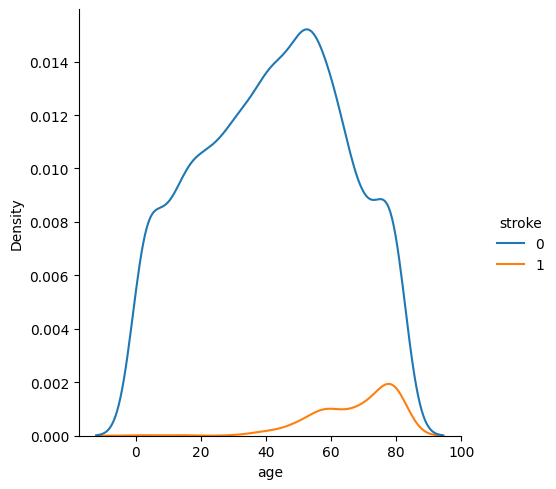

In [9]:
sns.displot(
    df,
    x="age",
    hue="stroke",
    kind="kde",
)
#los que tienen stroke tienen una edad limitada, pero los que no engloban en edad a los que si. esto generará falsos positivos

Ejercicio: Comprobar si hay más columnas que tienen correlación con stroke.

In [ ]:
# TODO!

## Dividir en conjuntos de entrenamiento y test

In [10]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0, shuffle=True, stratify=df.stroke)
# stratify obliga a q a la hora de hacer el split mantenga  las proporciones de la variable que le indiques. en este caso hemos puesto la var respuesta.

## Modelos

### Regresión logística

In [11]:
model_lr_unbalanced = LogisticRegression(class_weight=None, random_state=0)
model_lr_unbalanced.fit(X=np.array(df_train["age"]).reshape(-1, 1),
          y=df_train.stroke)
preds_lr_unbalanced = model_lr_unbalanced.predict(X=np.array(df_test["age"]).reshape(-1, 1))

In [ ]:
print_acc_rec_prec(df_test.stroke, preds_lr_unbalanced) # accuracy, este modelo es muy malo pq pilla todo ceros.

Accuracy: 0.9510763209393346
Recall: 0.0
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [12]:
sum(preds_lr_unbalanced)

0

Bueno, nuestro modelo tiene un 95% de precisión... y es una auténtica castaña: predice 0 sistemáticamente.

Ejercicio: Obtén las anteriores métricas en df_train

In [13]:
# TODO
preds_lr_unbalanced_train = model_lr_unbalanced.predict(X=np.array(df_test["age"]).reshape(-1, 1))
print_acc_rec_prec(df_test.stroke, preds_lr_unbalanced_train)

Accuracy: 0.9510763209393346
Recall: 0.0
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### Regresión logística: class weight balanced

In [14]:
model_lr_balanced = LogisticRegression(class_weight="balanced", random_state=0)
model_lr_balanced.fit(X=np.array(df_train["age"]).reshape(-1, 1),
          y=df_train.stroke)
preds_lr_balanced = model_lr_balanced.predict(X=np.array(df_test["age"]).reshape(-1, 1))

In [15]:
print_acc_rec_prec(df_test.stroke, preds_lr_balanced)

Accuracy: 0.7338551859099804
Recall: 0.76
Precision: 0.12751677852348994


¡Esto está mejor! Sigue sin ser muy bueno (hay muchos falsos positivos), ¡pero tiene estructura!

Ejercicio: dibuja las predicciones en test en función de la edad.

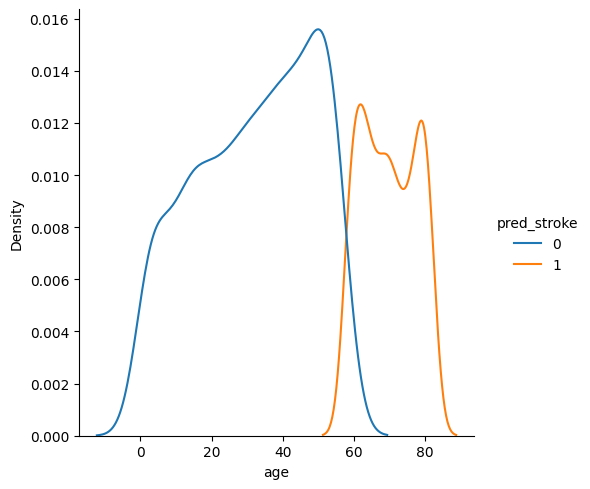

In [23]:
# TODO. Pista: ¡mira más arriba!
df_ = df_test.copy() # hacenos copia de los datos
df_["pred_stroke"]=preds_lr_balanced

sns.displot(
    df_,
    x="age",
    hue="pred_stroke",
    kind="kde",
)

### Árbol de decisión

In [ ]:
model_tree = DecisionTreeClassifier(random_state=0, class_weight="balanced", max_depth=5)
model_tree.fit(X=df_train[["age", "avg_glucose_level"]], y=df_train.stroke)
preds_tree = model_tree.predict(df_test[["age", "avg_glucose_level"]])

In [ ]:
print_acc_rec_prec(df_test.stroke, preds_tree)

Accuracy: 0.7697325505544683
Recall: 0.68
Precision: 0.13421052631578947


In [ ]:
df_train.stroke.unique()

array([0, 1])

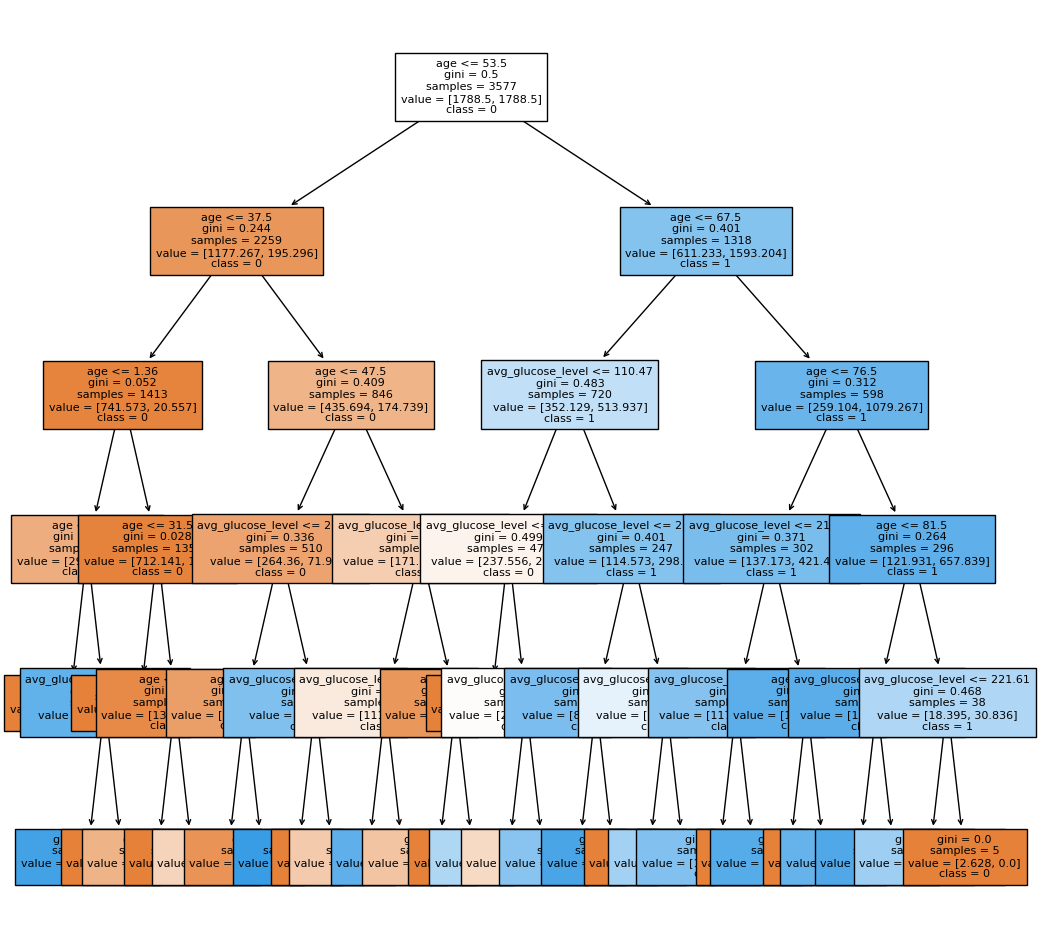

In [ ]:
plt.figure(figsize=(12, 12))
plot_tree(model_tree, filled=True, fontsize=8, feature_names=df_train[["age", "avg_glucose_level"]].columns, class_names=["0", "1"])
plt.show()

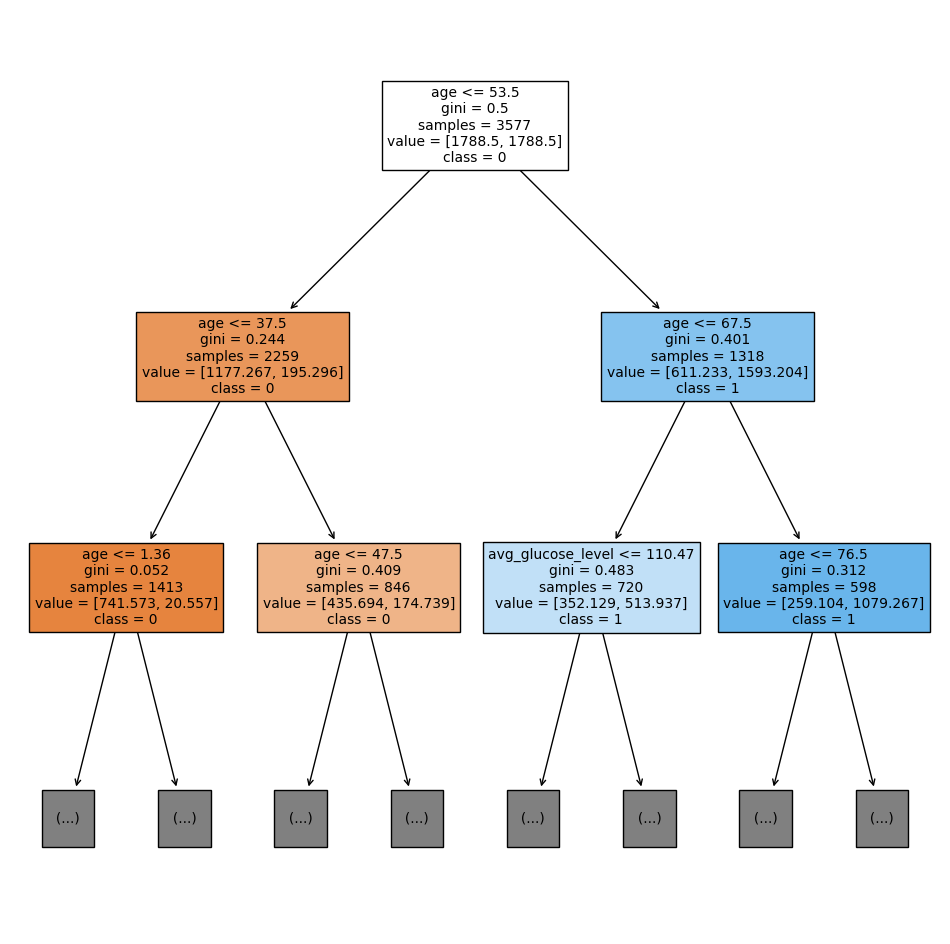

In [ ]:
plt.figure(figsize=(12, 12))
plot_tree(model_tree, filled=True, max_depth=2, fontsize=10, feature_names=df_train[["age", "avg_glucose_level"]].columns, class_names=["0", "1"])
plt.show()